In [33]:
import numpy as np
from sklearn import metrics
from scipy import interpolate
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [25]:
def ErrorRateAt95Recall1(labels, scores):
        recall_point = 0.95
        labels = np.asarray(labels)
        scores = np.asarray(scores)
        # Sort label-score tuples by the score in descending order.
        indices = np.argsort(scores)[::-1]    #降序排列
        sorted_labels = labels[indices]
        sorted_scores = scores[indices]
        n_match = sum(sorted_labels)
        n_thresh = recall_point * n_match
        thresh_index = np.argmax(np.cumsum(sorted_labels) >= n_thresh)
        print(sorted_labels)
        FP = np.sum(sorted_labels[:thresh_index] == 0)
        TN = np.sum(sorted_labels[thresh_index:] == 0)
        print(n_match, n_thresh)
        return float(FP) / float(FP + TN)

In [26]:
y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])


In [43]:
def TPR_FPR95(y, scores):
    #pos_label=1 将0,1中的1视为正样本
    fpr,tpr,thresh = roc_curve(y, scores, pos_label=1)
    fpr95 = float(interpolate.interp1d(fpr, tpr)(0.95))
    print('TPR@FPR95:', fpr95)
    print(auc(fpr, tpr))

In [27]:
ErrorRateAt95Recall1(y, scores)

[1 0 1 0]
2 1.9


0.5

import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y
y_probas = scores
skplt.metrics. (y_true, y_probas)
plt.show()

In [57]:
X, y = load_wine(return_X_y=True)
y = y == 2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)


svc_disp =  (svc, X_test, y_test)
plt.show()

In [58]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import  
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz =  (classifier, X[test], y[test],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()

SyntaxError: invalid syntax (<ipython-input-58-59beb0951e77>, line 8)

In [51]:
float(interpolate.interp1d(mean_fpr, mean_tpr)(0.95))

1.0

Logistic: f1=0.841 auc=0.898


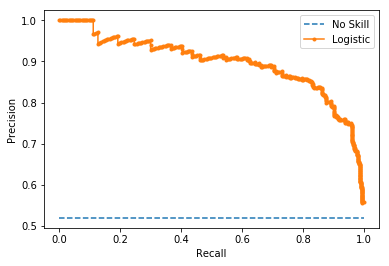

In [59]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()